### Imports

In [63]:
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

from tqdm import tqdm
tqdm.pandas()

### Load Data

In [84]:
df = pd.read_csv('./../data/processed/train.csv')

### Tags Data

In [85]:
df['Tags'] = df['Tags'].apply(lambda x : str(x).split())
counter = Counter()
_ = df['Tags'].apply(counter.update)
print("No. of tags present in train data = ",len(counter))

No. of tags present in train data =  41608


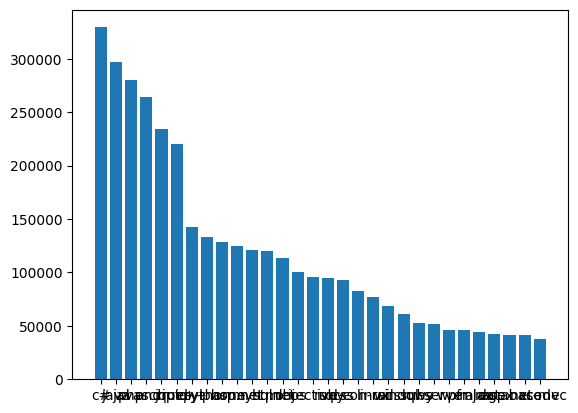

In [86]:
tags = dict(counter.most_common(30))

plt.bar(range(len(tags)), list(tags.values()), tick_label=list(tags.keys()))
plt.show()

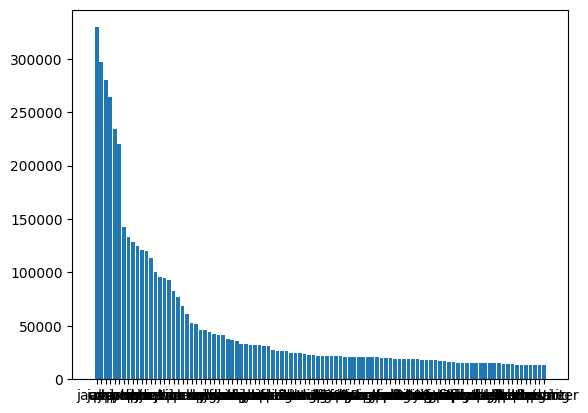

In [6]:
tags = dict(counter.most_common(100))
plt.bar(range(len(tags)), list(tags.values()), tick_label=list(tags.keys()))
plt.show()

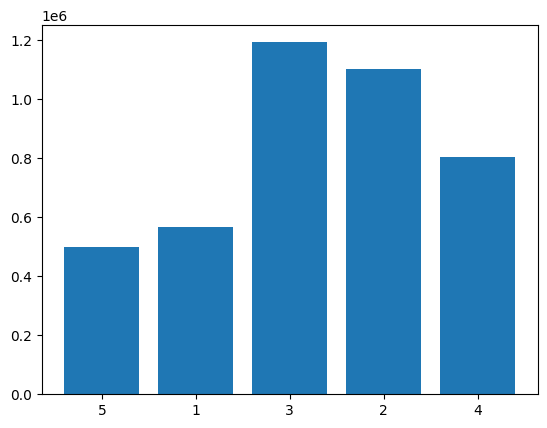

In [19]:
#no. of tags per question

value_counts = df['Tags'].apply(lambda x : str(len(x)))
counter2 = Counter()
_ = value_counts.apply(counter2.update)
tags_length=dict(counter2)
plt.bar(range(len(tags_length)), list(tags_length.values()), tick_label=list(tags_length.keys()))
plt.show()

<BarContainer object of 10 artists>

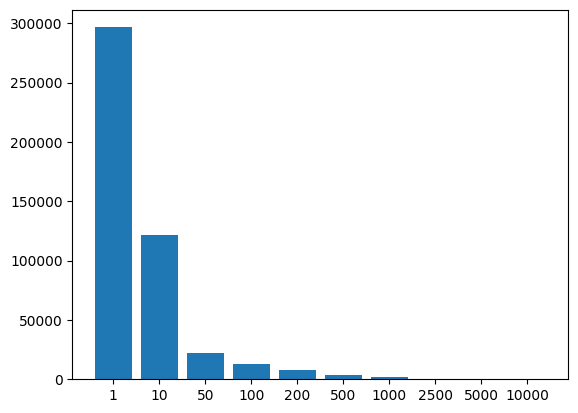

In [54]:
# 1st Tag : 329474 occurrences 
# 10th Tag: 124727 occurrences
# 50th Tag: 22185 occurrences
# 100th Tag: 13225 occurrences
# 200th Tag: 8043 occurrences
# 500th Tag: 3414 occurrences
# 1000th Tag: 1590 occurrences
# 2500th Tag: 557 occurrences
# 5000th Tag: 213 occurrences

keys = [1,10,50,100,200,500,1000,2500,5000,10000]
values = []

x = list(counter.most_common(40001))
for i in keys:
    values.append(x[i][1])
    
plt.bar(range(len(values)), values, tick_label=keys)

<BarContainer object of 7 artists>

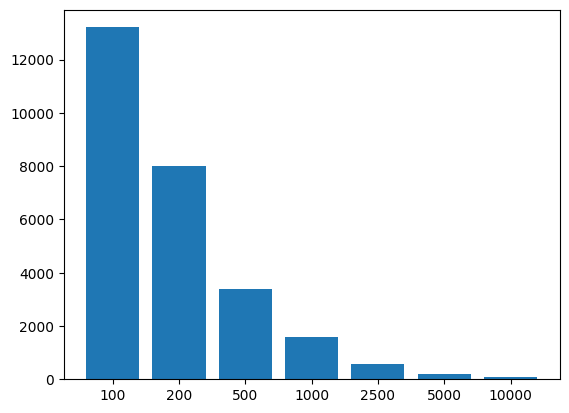

In [55]:
keys = [100,200,500,1000,2500,5000,10000]
values = []

x = list(counter.most_common(40001))
for i in keys:
    values.append(x[i][1])
    
plt.bar(range(len(values)), values, tick_label=keys)

<BarContainer object of 5 artists>

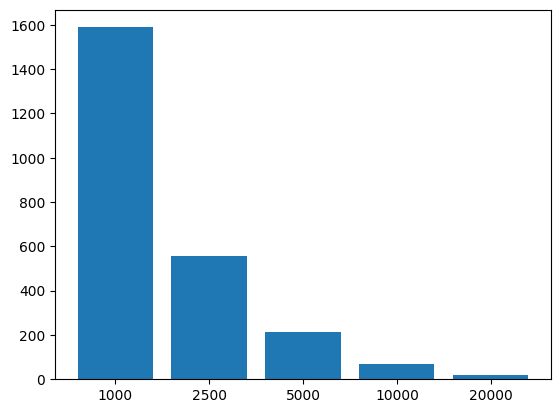

In [57]:
keys = [1000,2500,5000,10000, 20000]
values = []

x = list(counter.most_common(40001))
for i in keys:
    values.append(x[i][1])
    
plt.bar(range(len(values)), values, tick_label=keys)

### Processed Data Tags, Description and Title Data EDA

In [147]:
df = pd.read_csv('./../data/processed/processed_train_data.csv')

df['Text'] = df['Text'].progress_apply(lambda x : ast.literal_eval(x))
df['Tags'] = df['Tags'].progress_apply(lambda x : ast.literal_eval(x))

100%|███████████████████████████████████████████████████████████████████████████████████████████████████| 3190940/3190940 [00:29<00:00, 106641.10it/s]


In [88]:
counter = Counter()
_ = df['Tags'].apply(counter.update)
print("No. of tags present in processed train data = ",len(counter))

No. of tags present in processed train data =  100


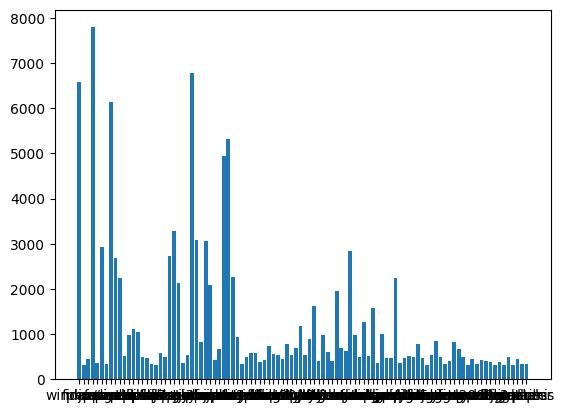

In [89]:
tags = dict(counter)
plt.bar(range(len(tags)), list(tags.values()), tick_label=list(tags.keys()))
plt.show()

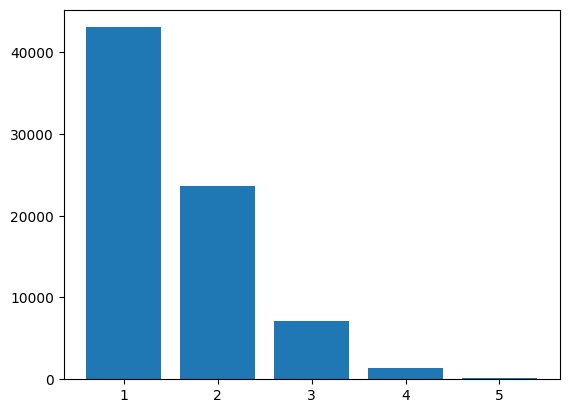

In [90]:
value_counts = df['Tags'].apply(lambda x : str(len(x)))
counter2 = Counter()
_ = value_counts.apply(counter2.update)
tags_length=dict(counter2)
plt.bar(range(len(tags_length)), list(tags_length.values()), tick_label=list(tags_length.keys()))
plt.show()

<BarContainer object of 4 artists>

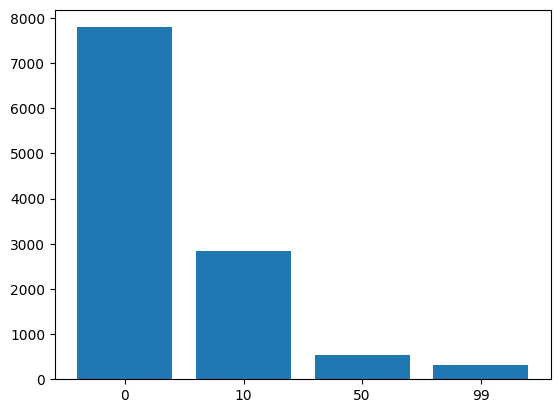

In [91]:
keys = [0,10,50,99]
values = []

x = list(counter.most_common(100))
for i in keys:
    values.append(x[i][1])
    
plt.bar(range(len(values)), values, tick_label=keys)

### Train Data Stats

In [92]:
text_counter = Counter()
_ = df['Text'].apply(text_counter.update)
print("No. of unique words present in processed train data = ",len(text_counter))

No. of unique words present in processed train data =  208697


In [99]:
import nltk
from nltk.corpus import stopwords

stop = stopwords.words('english')

In [123]:
more_stopwords = ['use', 'get', 'like', 'work', 'want', 'im', 'need', 'way', 
                  'one', 'ive', 'dont', 'thank', 'doesnt', 'cant', 'would','know',
                  'help','seem','see','also', 'someth', 'exampl', 'first', 'follow', 'question',
                  'eg', 'give', 'think', 'happen', 'often', 'there', 'given', 'take']

# I am not able to use
# This doesnot work
# I did like this
# thanks for your help
# please see above appraoch
# cant find why it is failing
# I am missing something here
# For Example, this is the approach

In [124]:
df['Text'] = df['Text'].progress_apply(lambda x: [item for item in x if item not in more_stopwords])

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████| 75364/75364 [00:00<00:00, 94533.02it/s]


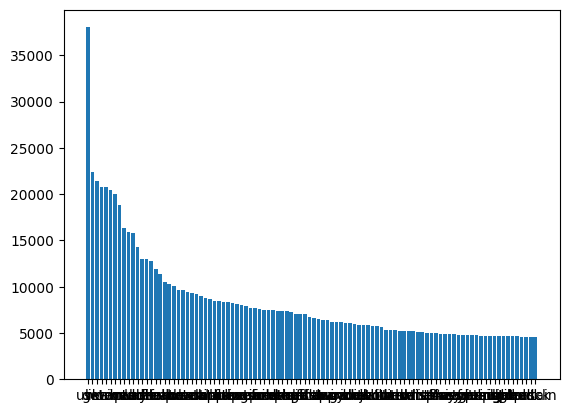

In [96]:
text = dict(text_counter.most_common(100))
plt.bar(range(len(text)), list(text.values()), tick_label=list(text.keys()))
plt.show()

In [111]:
len(text_counter)

208697

<BarContainer object of 10 artists>

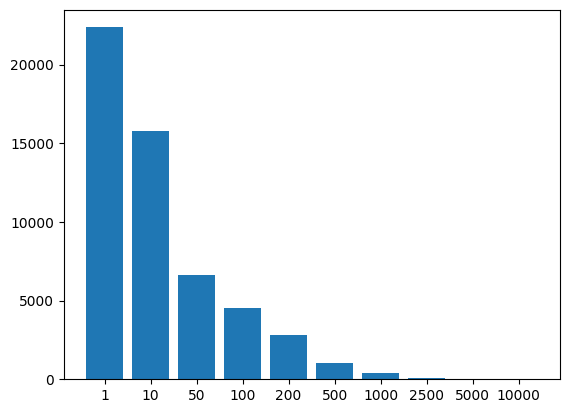

In [112]:
keys = [1,10,50,100,200,500,1000,2500,5000,10000]
values = []

x = list(text_counter.most_common(10001))
for i in keys:
    values.append(x[i][1])
    
plt.bar(range(len(values)), values, tick_label=keys)

<BarContainer object of 4 artists>

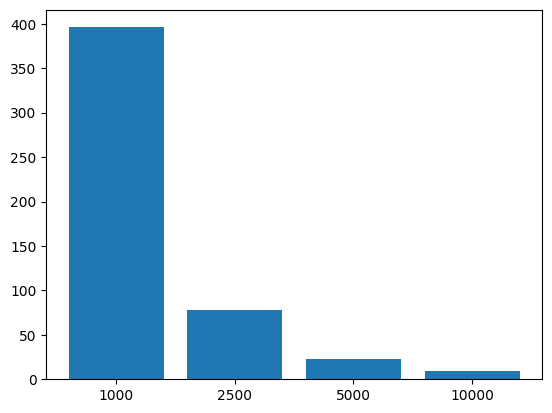

In [114]:
keys = [1000,2500,5000,10000]
values = []

x = list(text_counter.most_common(10001))
for i in keys:
    values.append(x[i][1])
    
plt.bar(range(len(values)), values, tick_label=keys)

<BarContainer object of 4 artists>

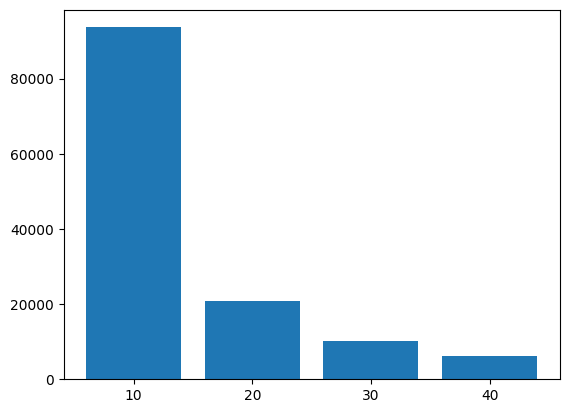

In [146]:
##Meaningless words
#stringhttpwwwgooglecomsearchhlenampqc
#outputhttpwwwgooglecomsearchhlenampqc+objectsim

# x = list(dict(text_counter).keys())

keys = [10, 20, 30, 40]
values = []
for i in keys:
    values.append(len([item for item in x if len(item)>i]))
plt.bar(range(len(values)), values, tick_label=keys)

In [143]:
# x = list(dict(text_counter).keys())
y = [item for item in x if len(item)>10]